# Data Scientist Assesment- Abhishek Patil

### Contents:
* [Load Dataset](#Load-Dataset)
* [Part 1: Analytics](#Part-1:-Analytics)
    * [Question 1 (a)](#Question-1-(a))
    * [Question 1 (b)](#Question-1-(b))
    * [Question 1 (c)](#Question-1-(c))
    * [Question 1 (d)](#Question-1-(d))
* [Part 2: Regression](#Part-2:-Regression)
    * [Line Plots (Before Outlier Removal)](#Line-Plots-(Before-Outlier-Removal))
    * [Remove Outliers](#Remove-Outliers)
    * [Line Plots (After Outlier Removal)](#Line-Plots-(After-Outlier-Removal))
    * [Interaction Variable](#Interaction-Variable)
    * [Train Test Split](#Train-Test-Split)
    * [Regression Model](#Regression-Model)
    * [Evaluation Metrics](#Evaluation-Metrics)
    * [Plot (True vs Fitted Values)](#Plot-(True-vs-Fitted-Values))    
    * [Coefficient Analysis](#Coefficient-Analysis)
    

# Load Dataset 

In [1]:
import pandas as pd
import os
from pathlib import Path
path = Path(os.getcwd())

In [2]:
df_1 = pd.read_excel('Adops & Data Scientist Sample Data.xlsx', sheet_name = 0)
df_2 = pd.read_excel('Adops & Data Scientist Sample Data.xlsx', sheet_name = 1, header = None)

# Part 1: Analytics

In [3]:
df_1.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [4]:
df_1.isna().sum()

ts            0
user_id       0
country_id    0
site_id       0
dtype: int64

## Question 1 (a)

In [5]:
df_1_BDV = df_1[df_1['country_id'] == 'BDV']
len(df_1_BDV)

844

In [6]:
df_1_BDV.groupby('site_id')['user_id'].nunique().sort_values(ascending = False)

site_id
5NPAU    544
N0OTG     90
3POLC      2
Name: user_id, dtype: int64

"5NPAU" has the highest number of unique visitors (544).

## Question 1 (b)

In [7]:
print(df_1['ts'].dtype)
df_1['ts'] = pd.to_datetime(df_1['ts'])
print(df_1['ts'].dtype)

object
datetime64[ns]


In [8]:
df_temp = df_1[(df_1['ts'] >= '2019-02-03 00:00:00') & (df_1['ts'] <= '2019-02-04 23:59:59')]
df_temp

,ts,user_id,country_id,site_id
1049,2019-02-03 00:02:31,LC3C7E,TL6,3POLC
1050,2019-02-03 00:03:09,LC3C7E,TL6,3POLC
1051,2019-02-03 00:03:46,LC3C7E,TL6,3POLC
1052,2019-02-03 00:04:12,LC3C7E,TL6,3POLC
1053,2019-02-03 00:04:25,LC3C7E,TL6,3POLC
...,...,...,...,...
2075,2019-02-04 23:54:56,LC34B0,XA7,N0OTG
2076,2019-02-04 23:55:46,LC3DEA,TL6,N0OTG
2077,2019-02-04 23:56:12,LC06C3,TL6,N0OTG
2078,2019-02-04 23:56:54,LC06C3,TL6,N0OTG


In [9]:
df_1_Q2 = df_temp.groupby(['user_id', 'site_id'])['ts'].count().reset_index()
df_1_Q2.columns = ['user_id', 'site_id', 'number of visits']
df_1_Q2[df_1_Q2['number of visits'] > 10]

,user_id,site_id,number of visits
3,LC06C3,N0OTG,25
417,LC3A59,N0OTG,26
485,LC3C7E,3POLC,15
493,LC3C9D,N0OTG,17


## Question 1 (c)

In [10]:
df_1_Q3 = df_1[['user_id','ts']].groupby('user_id').max()
df_1_Q3 = df_1_Q3.merge(df_1, on=['ts','user_id'])
df_1_Q3 = df_1_Q3.groupby('site_id').user_id.nunique()
df_1_Q3 = df_1_Q3.reset_index().rename(columns={'user_id':'num_of_users'})
df_1_Q3.sort_values(by = 'num_of_users', ascending = False).reset_index(drop=True).head(3)

,site_id,num_of_users
0,5NPAU,992
1,N0OTG,561
2,QGO3G,289


## Question 1 (d)

In [11]:
df_1_first = df_1.groupby('user_id').first()
df_1_last = df_1.groupby('user_id').last()

df_result = df_1_first.merge(df_1_last, on=['user_id','site_id'], how='inner')
df_result.head()

,ts_x,country_id_x,site_id,ts_y,country_id_y
user_id,,,,,
LC00C3,2019-02-03 18:52:50,QLT,5NPAU,2019-02-03 18:52:50,QLT
LC01C3,2019-02-04 11:35:10,QLT,5NPAU,2019-02-04 11:35:10,QLT
LC05C3,2019-02-02 14:14:44,BDV,5NPAU,2019-02-02 14:14:44,BDV
LC06C3,2019-02-01 22:49:39,TL6,N0OTG,2019-02-07 01:16:12,TL6
LC07C3,2019-02-05 19:06:42,BDV,5NPAU,2019-02-05 19:06:42,BDV


In [12]:
len(df_result)

1670

# Part 2: Regression

In [13]:
df_2.columns = ['A', 'B', 'C']
df_2.head()

,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


## Line Plots (Before Outlier Removal)

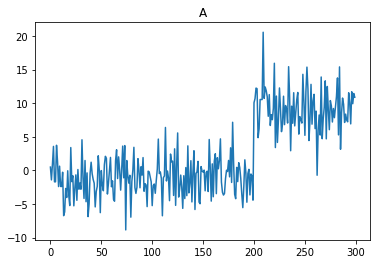

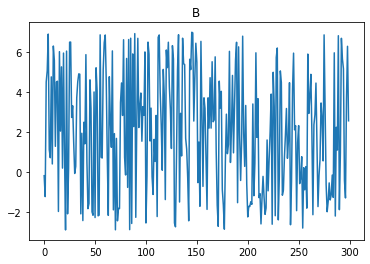

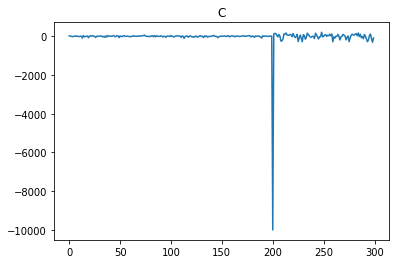

In [14]:
import matplotlib.pyplot as plt
for i, col in enumerate(df_2.columns):
    df_2[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

## Remove Outliers

In [15]:
def replace_outlier(val, mean, std):
    '''
    Replaces extreme values with median.
    
    PARAMETERS:
    val (float): Value.
    mean (float): Mean of the column.
    std (float): Standard deviation of the column.

    RETURNS:
    median (float): Median value which is used to replace outliers.
    '''
    if val > mean + 3*std:
        return median 
    elif val < mean - 3*std:
        return median 
    return val

for col in df_2.columns:
    median = df_2[col].median()
    mean = df_2[col].mean()
    std_dev = df_2[col].std(axis=0)
    df_2[col] = df_2[col].map(lambda x: replace_outlier(x, mean, std_dev))

## Line Plots (After Outlier Removal)

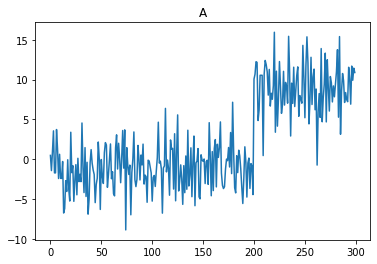

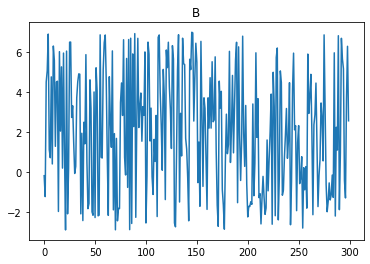

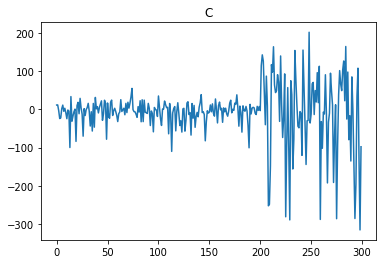

In [16]:
for i, col in enumerate(df_2.columns):
    df_2[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

## Interaction Variable

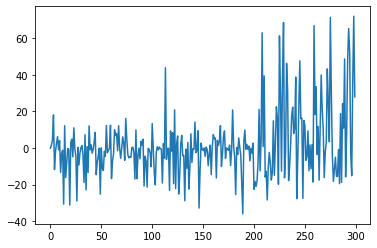

In [17]:
df_2['AxB'] = df_2['A'] * df_2['B']
plt.plot(df_2['AxB'])

## Train Test Split

In [18]:
def train_test_split(df, ratio):
    '''
    Split data into train and test data.
    
    PARAMETERS:
    df (pandas.core.frame.DataFrame): Original data to be split.
    ratio (float): Split ratio of the data (Between 0.25 to 1; default = 0.75).

    RETURNS:
    train_set (pandas.core.frame.DataFrame): Train data.
    test_set (pandas.core.frame.DataFrame): Test data.
    '''
    if((ratio > 1) and (ratio < 0.25)):
        ratio = 0.75
    num_of_rows = int(len(df) * ratio)
    df = df.sample(frac = 1)
    train_set = df[:num_of_rows]
    test_set = df[num_of_rows:]
    return train_set, test_set

train_set, test_set = train_test_split(df_2, 0.70)

In [19]:
X_train = train_set[['A', 'B', 'AxB']]
y_train = train_set[['C']]

X_test = test_set[['A', 'B', 'AxB']]
y_test = test_set[['C']]

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train

array([[-9.53579730e-02,  2.36096366e+00, -2.25136709e-01],
       [-7.97415386e-01,  6.05381976e+00, -4.82740902e+00],
       [-2.58928061e+00,  2.27701109e+00, -5.89582067e+00],
       [ 2.12152570e-01,  3.20132598e+00,  6.79169535e-01],
       [ 7.01464061e+00,  3.18254772e+00,  2.23244284e+01],
       [-2.39718926e+00,  1.28994027e+00, -3.09223097e+00],
       [-2.43752271e+00,  6.86001064e+00, -1.67214317e+01],
       [-1.73616435e+00,  5.76653603e+00, -1.00116543e+01],
       [-4.45298073e+00,  6.50607147e+00, -2.89714109e+01],
       [-3.72816236e+00,  5.22537243e+00, -1.94810368e+01],
       [ 4.16185239e+00,  3.90394829e+00,  1.62476565e+01],
       [-1.96618455e+00,  5.42118923e+00, -1.06590585e+01],
       [-2.68686259e+00,  6.02552907e+00, -1.61897686e+01],
       [-2.48521449e-01,  5.49647391e+00, -1.36599166e+00],
       [-6.67232231e-01,  6.50061967e+00, -4.33742296e+00],
       [-4.17313279e+00,  4.52374529e+00, -1.88781898e+01],
       [-6.28912047e+00,  4.00969131e+00

## Regression Model

In [21]:
import numpy as np
class Multiple_Linear_Regression():   
    def __init__ (self):
        self.theta=np.zeros(int(np.random.random()),float)[:,np.newaxis]; 
    
    def fit(self, X_train, y_train):
        '''
        Fit data to the model based on the matrix approach to Linear Regression. Actual magic happens here!  
        
        PARAMETERS:
        X_train (numpy.ndarray): Independent variables train data.
        y_train (numpy.ndarray): Dependent variable of train data.

        RETURNS:
        None
        '''
        X_b = np.c_[np.ones(len(X_train)), X_train] 
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
    
    def predict(self, X_test):
        '''
        Fucntion to predict on new data.
        
        PARAMETERS:
        X_test (numpy.ndarray): Independent variables data.

        RETURNS:
        y_predict (numpy.ndarray): Predicted dependent variable.
        '''
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)
        
        return y_predict

In [22]:
model = Multiple_Linear_Regression()

In [23]:
model.fit(X_train, y_train)

In [24]:
y_preds = model.predict(X_test)

## Evaluation Metrics

In [25]:
def mse(y_preds, y):
    '''
    Mean squared error.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    mse (float): Mean squared error.
    '''
    mse = ((y - y_preds)**2).mean()
    return mse

def rmse(y_preds, y):
    '''
    Root Mean squared error.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    rmse (float): Root Mean Squared Error.
    '''
    rmse = (((y - y_preds)**2).mean())**(1/2)
    return rmse

def r2(y_preds, y):
    '''
    R square score.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    r2 (float): R-Squared score.
    '''
    ssr = sum((y - y_preds) ** 2) 
    sst = sum((y - y.mean()) ** 2) 
    return 1 - ssr/sst

In [26]:
mse(y_preds, y_test), rmse(y_preds, y_test), r2(y_preds ,y_test)

(1486.5680564854385, 38.55603787327529, array([0.77058015]))

Here, RMSE and the R2 value are helpful in assesing the model performance. 

## Plot (True vs Fitted Values)

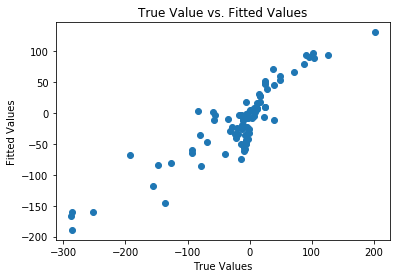

In [27]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_preds)
ax.set_xlabel('True Values')
ax.set_ylabel('Fitted Values')
ax.set_title('True Value vs. Fitted Values');

Looks pretty good. 

## Coefficient Analysis

In [28]:
model.theta

array([[ 10.491129  ],
       [  2.71755829],
       [-10.41377649],
       [ -2.19281552]])

Interesting. This means that:
* Unit increase in 'A' will lead to an increase in the 'C' and the effect is positive. 
* Unit increase in 'B' will lead to a decrease in the 'C' and the effect is negative. 
* Unit increase in 'AxB' will lead to a decrease in the 'C' and the effect is negative. 

One thing to note is that, using the interaction variable 'AxB' has signifacntly increased the model performance.

With more information regarding the actual nature of the data, their meaning and a background we can be able to further explore this data and build a stronger explanatory model.